In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading the MNIST data set with samples and splitting it
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing the data (making length = 1)
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [3]:
# model function
def create_model():
    # Create a neural network model
    # Add one flattened input layer for the pixels
    # Add two dense hidden layers
    # Add one dense output layer for the 10 digits
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

    # Compiling and optimizing model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Training the model
model = create_model()
model.fit(X_train, y_train, epochs=10)

Metal device set to: Apple M1


2022-07-16 09:28:46.169960: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-16 09:28:46.170199: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-07-16 09:28:46.459442: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  10/1875 [..............................] - ETA: 10s - loss: 2.1968 - accuracy: 0.3250  

2022-07-16 09:28:46.675613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.2597 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1059 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0735 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0537 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0413 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0314 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0263 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0198 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0180 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0161

In [5]:
# Evaluating the model
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

 22/313 [=>............................] - ETA: 1s - loss: 0.1062 - accuracy: 0.9716

2022-07-16 09:30:33.196176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.1082 - accuracy: 0.9746
0.10816197097301483
0.9746000170707703


In [6]:
# Saving the model
model.save('handwritten_digits.h5')

1/1 [==============================] - 0s 66ms/step
The number is probably a 7


2022-07-16 09:30:34.822845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


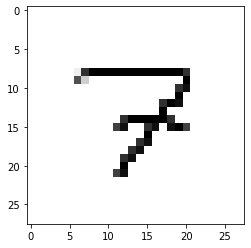

1/1 [==============================] - 0s 13ms/step
The number is probably a 2


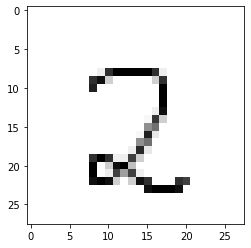

1/1 [==============================] - 0s 15ms/step
The number is probably a 9


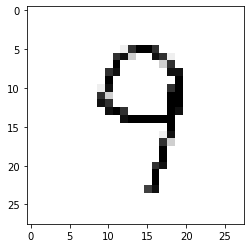

1/1 [==============================] - 0s 16ms/step
The number is probably a 8


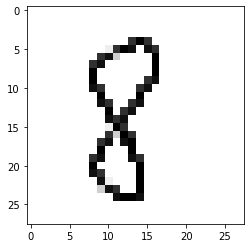

1/1 [==============================] - 0s 16ms/step
The number is probably a 5


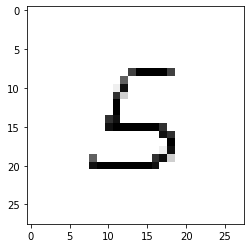

1/1 [==============================] - 0s 15ms/step
The number is probably a 1


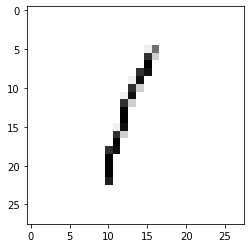

1/1 [==============================] - 0s 17ms/step
The number is probably a 1


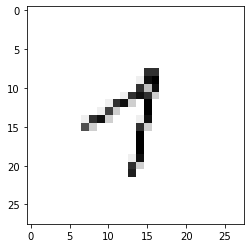

1/1 [==============================] - 0s 15ms/step
The number is probably a 1


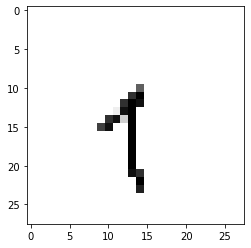

1/1 [==============================] - 0s 13ms/step
The number is probably a 7


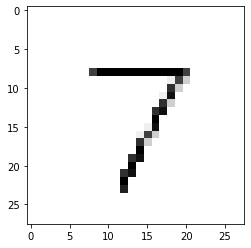

1/1 [==============================] - 0s 13ms/step
The number is probably a 7


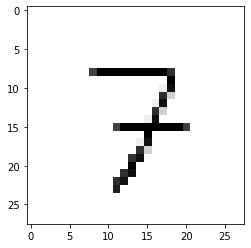

1/1 [==============================] - 0s 13ms/step
The number is probably a 0


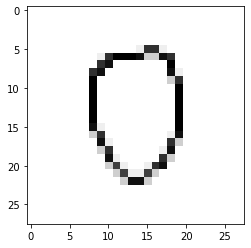

1/1 [==============================] - 0s 12ms/step
The number is probably a 5


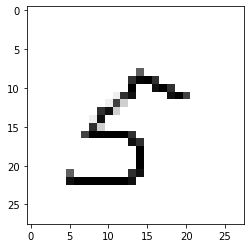

1/1 [==============================] - 0s 13ms/step
The number is probably a 3


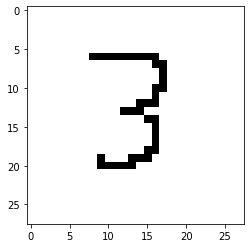

1/1 [==============================] - 0s 13ms/step
The number is probably a 2


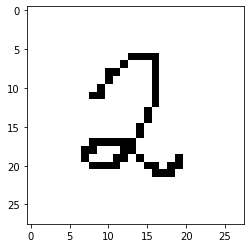

1/1 [==============================] - 0s 12ms/step
The number is probably a 1


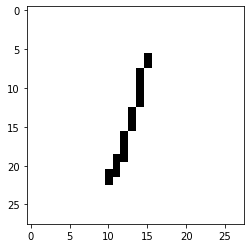

1/1 [==============================] - 0s 13ms/step
The number is probably a 0


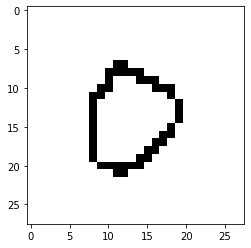

1/1 [==============================] - 0s 13ms/step
The number is probably a 1


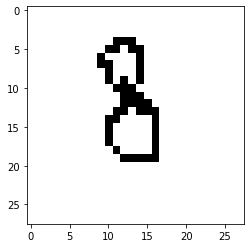

1/1 [==============================] - 0s 13ms/step
The number is probably a 7


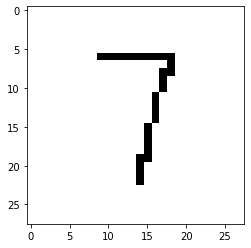

1/1 [==============================] - 0s 11ms/step
The number is probably a 4


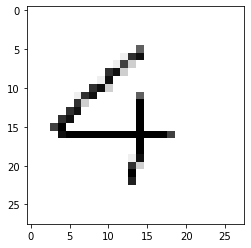

In [7]:
# Load custom images and predict them
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1
